<a href="https://colab.research.google.com/github/LuisKolb/viz2-2023S/blob/main/feature_space_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IRIS

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


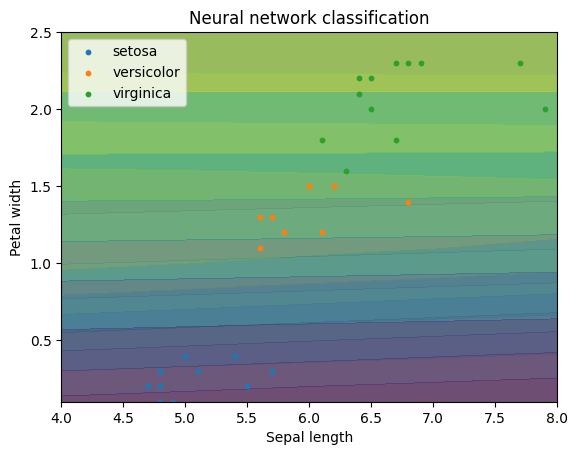

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Load the Iris dataset
iris = load_iris()

# Select the features to use for classification
X = iris.data[:, [0, 3]]  # sepal length and petal width
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a neural network classifier with a logistic output layer
clf = MLPClassifier(hidden_layer_sizes=(5, ), max_iter=1000, random_state=42, activation='logistic', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, tol=0.0001, verbose=False, warm_start=False)
clf.fit(X_train, y_train)

# Generate a grid of feature combinations
sepal_lengths = np.arange(4.0, 8.1, 0.1)
petal_widths = np.arange(0.1, 2.6, 0.1)
X1, X2 = np.meshgrid(sepal_lengths, petal_widths)
X_grid = np.column_stack((X1.ravel(), X2.ravel()))

# Predict the class probabilities for each feature combination
y_grid_prob = clf.predict_proba(X_grid)

# Reshape the predicted probabilities for plotting
n_classes = len(iris.target_names)
y_grid_prob = y_grid_prob.reshape(X1.shape + (n_classes,))

# Plot the contours of the class probabilities and decision boundaries
fig, ax = plt.subplots()
for i, class_name in enumerate(iris.target_names):
    # Plot the contour of the class probability for the current class
    ax.contourf(X1, X2, y_grid_prob[:, :, i], alpha=0.5)

# Plot the decision boundaries
y_pred = clf.predict(X_test)
for i, class_name in enumerate(iris.target_names):
    # Select the data points of the current class
    X_class = X_test[y_pred == i]
    # Plot the decision boundary for the current class
    ax.scatter(X_class[:, 0], X_class[:, 1], s=10, label=class_name)

# Add legend, axis labels and title
ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal width')
ax.set_title('Neural network classification')
ax.legend()

# Show the plot
plt.show()

## CIFAR-10

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<bound method Axes.set of <Axes: xlabel='Principal component 1', ylabel='Principal component 2'>>

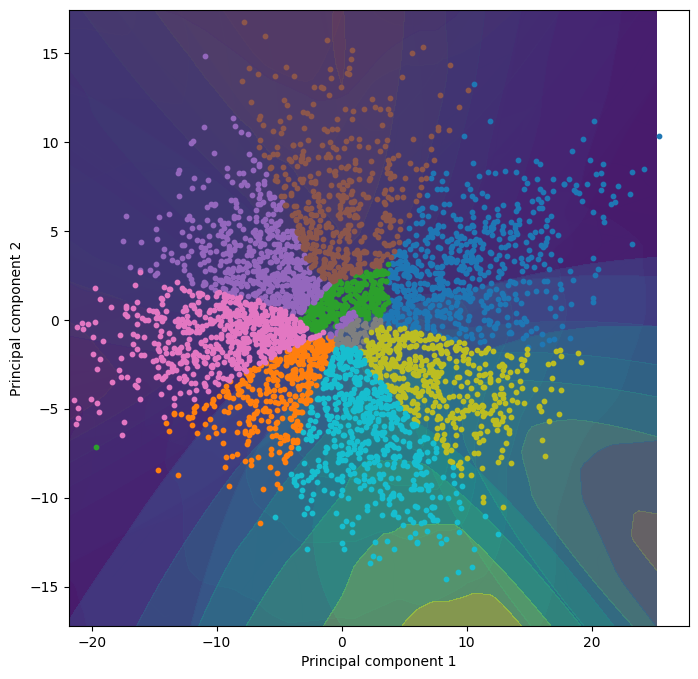

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

# Load the CIFAR-10 dataset
X, y = fetch_openml('CIFAR_10_small', version=1, return_X_y=True, as_frame=False)

# Convert the pixel values to a float between 0 and 1
X = X.astype('float32') / 255.0

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use PCA to reduce the dimensionality of the input
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a neural network classifier with a softmax output layer
clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
                    learning_rate='constant', learning_rate_init=0.001, max_iter=200, momentum=0.9,
                    nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True, tol=0.0001,
                    validation_fraction=0.1, verbose=False, early_stopping=False, beta_1=0.9, beta_2=0.999,
                    epsilon=1e-08, n_iter_no_change=10)

clf.fit(X_train_pca, y_train)

# Generate a grid of feature combinations
pca_1_range = np.linspace(X_train_pca[:, 0].min(), X_train_pca[:, 0].max(), 100)
pca_2_range = np.linspace(X_train_pca[:, 1].min(), X_train_pca[:, 1].max(), 100)
pca_1_grid, pca_2_grid = np.meshgrid(pca_1_range, pca_2_range)
pca_grid = np.stack([pca_1_grid.ravel(), pca_2_grid.ravel()], axis=-1)
np.savetxt("grid_1d.txt", pca_grid.ravel())

# Predict the class probabilities for each feature combination
y_grid_prob = clf.predict_proba(pca_grid)

# Reshape the predicted probabilities for plotting
n_classes = len(np.unique(y_train))
y_grid_prob = y_grid_prob.reshape(pca_1_grid.shape + (n_classes,))

for i in range(y_grid_prob.shape[2]):
  subArray = y_grid_prob[:, :, i].ravel()
  filename = f"sub_grid_prob_{i}.txt"
  np.savetxt(filename, subArray)

# Plot the contours of the class probabilities and decision boundaries
fig, ax = plt.subplots(figsize=(8, 8))
for i, class_name in enumerate(np.unique(y_train)):
    # Plot the contour of the class probability for the current class
    ax.contourf(pca_1_grid, pca_2_grid, y_grid_prob[:, :, i], alpha=0.5)

# Plot the decision boundaries
y_pred = clf.predict(X_test_pca)
for i, class_name in enumerate(np.unique(y_train)):
    # Select the data points of the current class
    X_class = X_test_pca[y_pred == class_name]
    # Plot the decision boundary for the current class
    ax.scatter(X_class[:, 0], X_class[:, 1], s=10, label=class_name)

# Add legend, axis labels and title
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set